In [1]:
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

import scipy as sp
import scipy.stats as sps

import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

In [2]:
rawData = pd.read_csv('../00. Data/train_prob-1.csv')
rawData

,id,product_code,loading,attribute_0,attribute_1,attribute_2,attribute_3,measurement_0,measurement_1,measurement_2,...,measurement_9,measurement_10,measurement_11,measurement_12,measurement_13,measurement_14,measurement_15,measurement_16,measurement_17,failure
0,0,A,80.10,material_7,material_8,9,5,7,8,4,...,10.672,15.859,17.594,15.193,15.029,NaN,13.034,14.684,764.100,0
1,1,A,84.89,material_7,material_8,9,5,14,3,3,...,12.448,17.947,17.915,11.755,14.732,15.425,14.395,15.631,682.057,0
2,2,A,82.43,material_7,material_8,9,5,12,1,5,...,12.715,15.607,NaN,13.798,16.711,18.631,14.094,17.946,663.376,0
3,3,A,101.07,material_7,material_8,9,5,13,2,6,...,12.471,16.346,18.377,10.020,15.250,15.562,16.154,17.172,826.282,0
4,4,A,188.06,material_7,material_8,9,5,9,2,8,...,10.337,17.082,19.932,12.428,16.182,12.760,13.153,16.412,579.885,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21453,26565,E,158.95,material_7,material_6,6,9,6,16,4,...,NaN,12.177,17.942,10.112,15.795,18.572,16.144,NaN,729.131,0
21454,26566,E,146.02,material_7,material_6,6,9,10,12,8,...,11.242,14.179,20.564,10.234,14.450,14.322,13.146,16.471,853.924,0
21455,26567,E,115.62,material_7,material_6,6,9,1,10,1,...,11.407,16.437,17.476,8.668,15.069,16.599,15.590,14.065,750.364,0
21456,26568,E,106.38,material_7,material_6,6,9,2,9,4,...,11.392,17.064,17.814,14.928,16.273,15.485,13.624,12.865,730.156,0


In [3]:
rawData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21458 entries, 0 to 21457
Data columns (total 26 columns):
id                21458 non-null int64
product_code      21458 non-null object
loading           21257 non-null float64
attribute_0       21458 non-null object
attribute_1       21458 non-null object
attribute_2       21458 non-null int64
attribute_3       21458 non-null int64
measurement_0     21458 non-null int64
measurement_1     21458 non-null int64
measurement_2     21458 non-null int64
measurement_3     21146 non-null float64
measurement_4     21016 non-null float64
measurement_5     20893 non-null float64
measurement_6     20818 non-null float64
measurement_7     20692 non-null float64
measurement_8     20605 non-null float64
measurement_9     20469 non-null float64
measurement_10    20399 non-null float64
measurement_11    20278 non-null float64
measurement_12    20171 non-null float64
measurement_13    20063 non-null float64
measurement_14    19976 non-null float64
meas

<AxesSubplot:>

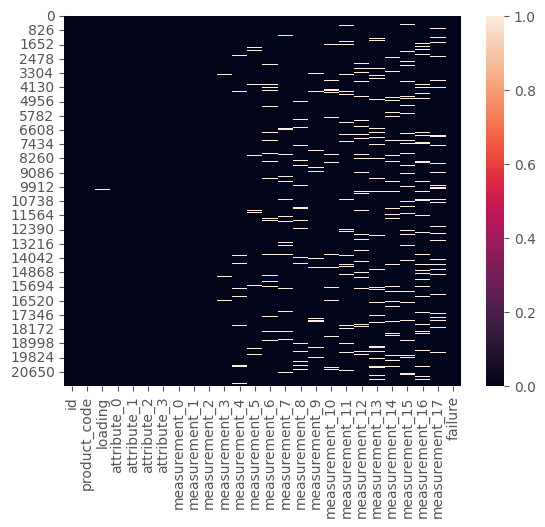

In [4]:
sns.heatmap( rawData.isna() )

In [5]:
rawData.describe().T

,count,mean,std,min,25%,50%,75%,max
id,21458.0,12001.377994,7985.775793,0.000,5364.25000,10728.5000,16092.75000,26569.000
loading,21257.0,127.680897,38.987953,33.160,100.01000,122.2500,148.77000,385.860
attribute_2,21458.0,6.933684,1.585791,5.000,5.00000,6.0000,8.00000,9.000
attribute_3,21458.0,7.535977,1.474057,5.000,8.00000,8.0000,8.00000,9.000
measurement_0,21458.0,7.311912,4.261533,0.000,4.00000,7.0000,10.00000,29.000
measurement_1,21458.0,7.861264,4.152362,0.000,5.00000,8.0000,10.00000,28.000
measurement_2,21458.0,6.016917,3.299464,0.000,4.00000,6.0000,8.00000,24.000
measurement_3,21146.0,17.795325,1.002861,13.968,17.11825,17.7910,18.47300,21.499
measurement_4,21016.0,11.736571,0.997623,8.008,11.05400,11.7370,12.41800,16.484
measurement_5,20893.0,17.130985,0.996501,12.073,16.44700,17.1360,17.80800,21.425


# 전처리

## 단계 1

In [6]:
# 얕은 복사 Vs. 깊은 복사
# 필터링 하는 경우에는 얕은 복사가 됩니다.
org = rawData.copy()

In [7]:
for i, col in enumerate( org.loc[ :, 'measurement_3':'measurement_17'].columns ):
    org[ f'isna_{i+3}' ] = org[col].isna()

In [8]:
org

,id,product_code,loading,attribute_0,attribute_1,attribute_2,attribute_3,measurement_0,measurement_1,measurement_2,...,isna_8,isna_9,isna_10,isna_11,isna_12,isna_13,isna_14,isna_15,isna_16,isna_17
0,0,A,80.10,material_7,material_8,9,5,7,8,4,...,False,False,False,False,False,False,True,False,False,False
1,1,A,84.89,material_7,material_8,9,5,14,3,3,...,False,False,False,False,False,False,False,False,False,False
2,2,A,82.43,material_7,material_8,9,5,12,1,5,...,False,False,False,True,False,False,False,False,False,False
3,3,A,101.07,material_7,material_8,9,5,13,2,6,...,False,False,False,False,False,False,False,False,False,False
4,4,A,188.06,material_7,material_8,9,5,9,2,8,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21453,26565,E,158.95,material_7,material_6,6,9,6,16,4,...,False,True,False,False,False,False,False,False,True,False
21454,26566,E,146.02,material_7,material_6,6,9,10,12,8,...,False,False,False,False,False,False,False,False,False,False
21455,26567,E,115.62,material_7,material_6,6,9,1,10,1,...,False,False,False,False,False,False,False,False,False,False
21456,26568,E,106.38,material_7,material_6,6,9,2,9,4,...,False,False,False,False,False,False,False,False,False,False


## 단계 2

In [9]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import LinearRegression

In [10]:
org.columns

Index(['id', 'product_code', 'loading', 'attribute_0', 'attribute_1',
       'attribute_2', 'attribute_3', 'measurement_0', 'measurement_1',
       'measurement_2', 'measurement_3', 'measurement_4', 'measurement_5',
       'measurement_6', 'measurement_7', 'measurement_8', 'measurement_9',
       'measurement_10', 'measurement_11', 'measurement_12', 'measurement_13',
       'measurement_14', 'measurement_15', 'measurement_16', 'measurement_17',
       'failure', 'isna_3', 'isna_4', 'isna_5', 'isna_6', 'isna_7', 'isna_8',
       'isna_9', 'isna_10', 'isna_11', 'isna_12', 'isna_13', 'isna_14',
       'isna_15', 'isna_16', 'isna_17'],
      dtype='object')

In [11]:
cols = [ 
    'measurement_3', 'measurement_4', 'measurement_5',
    'measurement_6', 'measurement_7', 'measurement_8', 'measurement_9', 'measurement_17', 
]

In [12]:
imputer = IterativeImputer( LinearRegression(), random_state=123 )

for i in org.product_code.unique():
    org.loc[ org.product_code == i, cols ] = imputer.fit_transform( org.loc[ org.product_code == i, cols] )

<AxesSubplot:>

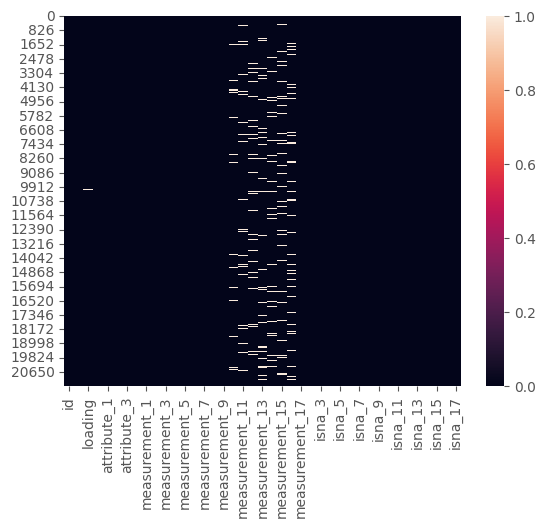

In [13]:
sns.heatmap( org.isna() )

## 단계 3

In [14]:
cols = org.loc[ :, 'measurement_10':'measurement_16'].columns

org[cols] = org.groupby('product_code')[cols].apply( lambda x : x.fillna( x.mean(), axis=0 ) ).reset_index()[cols]
org

,id,product_code,loading,attribute_0,attribute_1,attribute_2,attribute_3,measurement_0,measurement_1,measurement_2,...,isna_8,isna_9,isna_10,isna_11,isna_12,isna_13,isna_14,isna_15,isna_16,isna_17
0,0,A,80.10,material_7,material_8,9,5,7,8,4,...,False,False,False,False,False,False,True,False,False,False
1,1,A,84.89,material_7,material_8,9,5,14,3,3,...,False,False,False,False,False,False,False,False,False,False
2,2,A,82.43,material_7,material_8,9,5,12,1,5,...,False,False,False,True,False,False,False,False,False,False
3,3,A,101.07,material_7,material_8,9,5,13,2,6,...,False,False,False,False,False,False,False,False,False,False
4,4,A,188.06,material_7,material_8,9,5,9,2,8,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21453,26565,E,158.95,material_7,material_6,6,9,6,16,4,...,False,True,False,False,False,False,False,False,True,False
21454,26566,E,146.02,material_7,material_6,6,9,10,12,8,...,False,False,False,False,False,False,False,False,False,False
21455,26567,E,115.62,material_7,material_6,6,9,1,10,1,...,False,False,False,False,False,False,False,False,False,False
21456,26568,E,106.38,material_7,material_6,6,9,2,9,4,...,False,False,False,False,False,False,False,False,False,False


<AxesSubplot:>

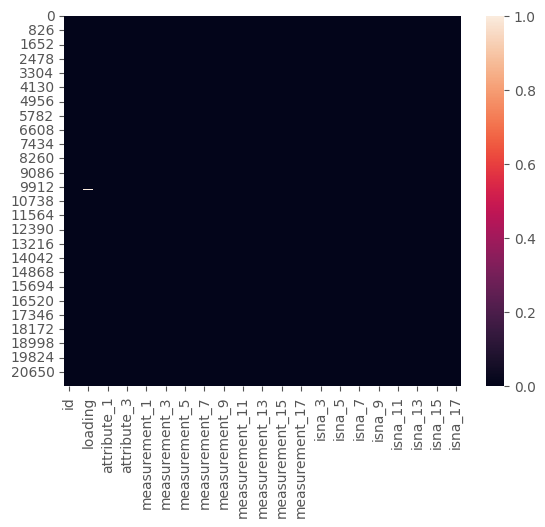

In [15]:
sns.heatmap( org.isna() )

In [16]:
org.describe().loc[ 'mean':'std', 'measurement_3':'measurement_17'].round(3)

,measurement_3,measurement_4,measurement_5,measurement_6,measurement_7,measurement_8,measurement_9,measurement_10,measurement_11,measurement_12,measurement_13,measurement_14,measurement_15,measurement_16,measurement_17
mean,17.796,11.736,17.131,17.506,11.719,19.022,11.434,16.034,19.194,11.734,15.666,16.033,15.051,16.398,701.768
std,0.997,0.994,0.994,0.992,0.993,1.005,0.997,1.278,1.579,1.433,1.149,1.461,1.478,1.671,119.180


In [17]:
basetable = org.copy()

# 문제 1

## 단계 1

In [18]:
p = 0.2114

증거계산

In [19]:
# 관측된 전체 수는 measurement_3이 결측일 때의 총합
n = basetable['isna_3'].sum()

# measurement_3이 결측일 때, 실패하는 경우의 수
x = basetable.loc[ basetable['isna_3'] == True, 'failure'].sum()

# p_hat = x / n
p_hat = x / n
p_hat

0.14423076923076922

In [20]:
z_value = (p_hat - p) / np.sqrt( p * (1-p) / n)
z_value

-2.905807189028007

In [21]:
# 단측검정
# 1 - sps.norm.cdf( z_value, loc=0, scale=1 )
# sps.norm.cdf( z_value, loc=0, scale=1 )

# 양측검정
2 * sps.norm.cdf( z_value, loc=0, scale=1 )

0.0036630709140241546

In [22]:
from statsmodels.stats.proportion import proportions_ztest

In [23]:
proportions_ztest( count=x, nobs=n, value=p, prop_var=p, alternative='two-sided')

(-2.905807189028007, 0.0036630709140241546)

## 단계 3

In [24]:
p = 0.2114
ans = 0

In [25]:
for col in basetable.loc[ :, 'isna_3':'isna_17'].columns:
    n = basetable[col].sum()
    x = basetable.loc[ basetable[col] == True, 'failure'].sum()
    _, pvalue = proportions_ztest( count=x, nobs=n, value=p, prop_var=p, alternative='two-sided')
    
    if pvalue < 0.05: # 귀무가설 기각, 대립가설 채택
        ans += pvalue
        print( pvalue, col, 'o')
    else:
        print( pvalue, col, 'x')

0.0036630709140241546 isna_3 o
0.17803686833140808 isna_4 x
0.026325008335499278 isna_5 o
0.793491357072205 isna_6 x
0.37298091572329806 isna_7 x
0.48514534123655306 isna_8 x
0.589649524697301 isna_9 x
0.44594047726157915 isna_10 x
0.9175464043670771 isna_11 x
0.5421744277936988 isna_12 x
0.6507952588133231 isna_13 x
0.49582912857498873 isna_14 x
0.9938599942603648 isna_15 x
0.6324265724265041 isna_16 x
0.8485233234124769 isna_17 x


In [26]:
round(ans, 3)

0.03

In [27]:
prob1 = basetable.copy()
prob1['na_1'] = basetable['isna_3']
prob1['na_2'] = basetable['isna_5']
prob1

,id,product_code,loading,attribute_0,attribute_1,attribute_2,attribute_3,measurement_0,measurement_1,measurement_2,...,isna_10,isna_11,isna_12,isna_13,isna_14,isna_15,isna_16,isna_17,na_1,na_2
0,0,A,80.10,material_7,material_8,9,5,7,8,4,...,False,False,False,False,True,False,False,False,False,False
1,1,A,84.89,material_7,material_8,9,5,14,3,3,...,False,False,False,False,False,False,False,False,False,False
2,2,A,82.43,material_7,material_8,9,5,12,1,5,...,False,True,False,False,False,False,False,False,False,False
3,3,A,101.07,material_7,material_8,9,5,13,2,6,...,False,False,False,False,False,False,False,False,False,False
4,4,A,188.06,material_7,material_8,9,5,9,2,8,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21453,26565,E,158.95,material_7,material_6,6,9,6,16,4,...,False,False,False,False,False,False,True,False,False,False
21454,26566,E,146.02,material_7,material_6,6,9,10,12,8,...,False,False,False,False,False,False,False,False,False,False
21455,26567,E,115.62,material_7,material_6,6,9,1,10,1,...,False,False,False,False,False,False,False,False,False,False
21456,26568,E,106.38,material_7,material_6,6,9,2,9,4,...,False,False,False,False,False,False,False,False,False,False


# 문제 2

## 단계 1

In [28]:
# 얕은 복사 Vs. 깊은복사
prob2 = prob1.loc[ prob1['loading'].notna() ].copy()
prob2

,id,product_code,loading,attribute_0,attribute_1,attribute_2,attribute_3,measurement_0,measurement_1,measurement_2,...,isna_10,isna_11,isna_12,isna_13,isna_14,isna_15,isna_16,isna_17,na_1,na_2
0,0,A,80.10,material_7,material_8,9,5,7,8,4,...,False,False,False,False,True,False,False,False,False,False
1,1,A,84.89,material_7,material_8,9,5,14,3,3,...,False,False,False,False,False,False,False,False,False,False
2,2,A,82.43,material_7,material_8,9,5,12,1,5,...,False,True,False,False,False,False,False,False,False,False
3,3,A,101.07,material_7,material_8,9,5,13,2,6,...,False,False,False,False,False,False,False,False,False,False
4,4,A,188.06,material_7,material_8,9,5,9,2,8,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21453,26565,E,158.95,material_7,material_6,6,9,6,16,4,...,False,False,False,False,False,False,True,False,False,False
21454,26566,E,146.02,material_7,material_6,6,9,10,12,8,...,False,False,False,False,False,False,False,False,False,False
21455,26567,E,115.62,material_7,material_6,6,9,1,10,1,...,False,False,False,False,False,False,False,False,False,False
21456,26568,E,106.38,material_7,material_6,6,9,2,9,4,...,False,False,False,False,False,False,False,False,False,False


In [29]:
prob2['loading_log'] = np.log( prob2['loading'] )

## 단계 2

In [30]:
prob2.product_code.unique()

array(['A', 'B', 'C', 'E'], dtype=object)

In [31]:
a = prob2.loc[ prob2.product_code == 'A', 'loading_log' ]
b = prob2.loc[ prob2.product_code == 'B', 'loading_log' ]
c = prob2.loc[ prob2.product_code == 'C', 'loading_log' ]
e = prob2.loc[ prob2.product_code == 'E', 'loading_log' ]

sps.bartlett( a, b, c, e )

BartlettResult(statistic=1.928667047072185, pvalue=0.5873433093297675)

In [33]:
B = sps.bartlett( *prob2.groupby('product_code')['loading_log'].agg(list).tolist() ).pvalue
B

0.5873433093297675

## 단계 3

In [34]:
C = prob2.groupby('product_code')['loading_log'].apply( lambda x : sps.jarque_bera(x).pvalue > 0.05 ).sum()
C

3

## 단계 4

In [35]:
D = sps.f_oneway( *prob2.groupby('product_code')['loading_log'].agg(list).tolist() ).pvalue
D

0.7733782072320899

In [36]:
# 빈도수 테이블을 만듭니다.
table = pd.crosstab( index=prob2['attribute_0'].str.cat( prob2['attribute_1']), columns=prob2['failure'] )
table

failure,0,1
attribute_0,,
material_5material_5,4162,1047
material_7material_6,4181,1100
material_7material_8,8413,2354


In [37]:
pvalue = sps.chi2_contingency(table)[1]
E = 1 if pvalue < 0.01 else 0
E

0

In [38]:
round( B + C + D + E, 2 )

4.36

### Packing Vs. Unpacking

In [39]:
# 가변 인자
def func( *args ): # packing
    return args

In [40]:
# 함수의 정의와 동일한 개수와 순서로 입력값을 전달
# unpacking
func( *[10, 20, 30] )

(10, 20, 30)

# 문제 3

## 단계 1

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression

In [42]:
prob3 = prob1.copy()

In [43]:
# loading 결측치는 평균으로 대체
prob3.loading = prob3.loading.fillna( prob3.loading.mean() )

In [44]:
prob3.columns

Index(['id', 'product_code', 'loading', 'attribute_0', 'attribute_1',
       'attribute_2', 'attribute_3', 'measurement_0', 'measurement_1',
       'measurement_2', 'measurement_3', 'measurement_4', 'measurement_5',
       'measurement_6', 'measurement_7', 'measurement_8', 'measurement_9',
       'measurement_10', 'measurement_11', 'measurement_12', 'measurement_13',
       'measurement_14', 'measurement_15', 'measurement_16', 'measurement_17',
       'failure', 'isna_3', 'isna_4', 'isna_5', 'isna_6', 'isna_7', 'isna_8',
       'isna_9', 'isna_10', 'isna_11', 'isna_12', 'isna_13', 'isna_14',
       'isna_15', 'isna_16', 'isna_17', 'na_1', 'na_2'],
      dtype='object')

In [45]:
# 입력변수 21개
# 연속형 변수에 대해서만 표준화 처리
con_cols = [
    'measurement_0', 'measurement_1',
    'measurement_2', 'measurement_3', 'measurement_4', 'measurement_5',
    'measurement_6', 'measurement_7', 'measurement_8', 'measurement_9',
    'measurement_10', 'measurement_11', 'measurement_12', 'measurement_13',
    'measurement_14', 'measurement_15', 'measurement_16', 'measurement_17',
]
cols = ['loading']
cat_cols = [ 'na_1', 'na_2' ]
target = ['failure']

In [46]:
x_train, x_test, y_train, y_test = train_test_split( prob3[ cols + con_cols + cat_cols ], prob3[target], train_size=0.8, random_state=123 )
print( x_train.shape, x_test.shape, y_train.shape, y_test.shape )

(17166, 21) (4292, 21) (17166, 1) (4292, 1)


In [47]:
scaler = StandardScaler()
scaler.fit( x_train[con_cols] )

StandardScaler(copy=True, with_mean=True, with_std=True)

In [48]:
x_train[ con_cols ] = scaler.transform( x_train[con_cols] )
x_test[ con_cols ] = scaler.transform( x_test[con_cols] )

## 단계 2

In [71]:
model = LogisticRegression( solver='lbfgs', random_state=123 ).fit( x_train[['loading', 'measurement_17']], y_train )

In [72]:
y_hat = model.predict_proba( x_test[ ['loading', 'measurement_17'] ] )[:, 1]
best_auc = roc_auc_score( y_test, y_hat )
best_auc

0.5862805653930709

## 단계 3

In [51]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

c:\users\student\appdata\local\programs\python\python37\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [73]:
model = LogisticRegression( solver='lbfgs', random_state=123 )
selection = SFS( model, k_features='best', forward=True, scoring='roc_auc' ).fit(x_train[cols+con_cols+cat_cols], y_train)

In [74]:
selection.k_score_

0.5903086655691363

In [75]:
selection.k_feature_names_

('loading',
 'measurement_2',
 'measurement_4',
 'measurement_6',
 'measurement_7',
 'measurement_11',
 'measurement_14',
 'measurement_17',
 'na_1')

In [76]:
round( selection.k_score_, 3 )

0.59

In [78]:
pd.DataFrame( selection.subsets_ )

,1,2,3,4,5,6,7,8,9,10,...,12,13,14,15,16,17,18,19,20,21
feature_idx,"(0,)","(0, 18)","(0, 5, 18)","(0, 5, 7, 18)","(0, 5, 7, 15, 18)","(0, 5, 7, 15, 18, 19)","(0, 5, 7, 12, 15, 18, 19)","(0, 5, 7, 8, 12, 15, 18, 19)","(0, 3, 5, 7, 8, 12, 15, 18, 19)","(0, 3, 5, 7, 8, 12, 15, 16, 18, 19)",...,"(0, 3, 5, 6, 7, 8, 12, 14, 15, 16, 18, 19)","(0, 3, 5, 6, 7, 8, 12, 14, 15, 16, 17, 18, 19)","(0, 2, 3, 5, 6, 7, 8, 12, 14, 15, 16, 17, 18, 19)","(0, 1, 2, 3, 5, 6, 7, 8, 12, 14, 15, 16, 17, 1...","(0, 1, 2, 3, 4, 5, 6, 7, 8, 12, 14, 15, 16, 17...","(0, 1, 2, 3, 4, 5, 6, 7, 8, 12, 14, 15, 16, 17...","(0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 12, 14, 15, 16...","(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 14, 15,...","(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 13, 14,...","(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
cv_scores,"[0.5815787363043461, 0.6032190083483984, 0.579...","[0.5864242464852221, 0.602686315532896, 0.5800...","[0.5850856460612558, 0.6071555523958481, 0.582...","[0.5859678938947231, 0.6065690317076639, 0.583...","[0.5847963012597159, 0.6063593061282525, 0.583...","[0.5809216190313751, 0.6085967175153867, 0.580...","[0.579887592082714, 0.6086028112368224, 0.5835...","[0.581648026769978, 0.6082950783043204, 0.5819...","[0.5807926829268293, 0.6088795677520261, 0.582...","[0.5805728824021507, 0.6081864069387175, 0.581...",...,"[0.5821419434224312, 0.6067335621864273, 0.579...","[0.5825084468377151, 0.6058367695151429, 0.579...","[0.5817982830177952, 0.5993027767057342, 0.578...","[0.5811266985047472, 0.5992519956937702, 0.580...","[0.5811805064853846, 0.5992103552639597, 0.580...","[0.5827688571591011, 0.5971659117222887, 0.577...","[0.581137358576383, 0.598150555544271, 0.57701...","[0.582065292431146, 0.5975909487924276, 0.5806...","[0.5812063952307855, 0.5981678210883387, 0.577...","[0.5803835392250026, 0.5952854908492616, 0.577..."
avg_score,0.58726,0.58871,0.589472,0.589487,0.589511,0.589787,0.590065,0.590082,0.590309,0.589889,...,0.589477,0.589465,0.588394,0.588077,0.58762,0.587099,0.586531,0.586571,0.586301,0.584912
feature_names,"(loading,)","(loading, measurement_17)","(loading, measurement_4, measurement_17)","(loading, measurement_4, measurement_6, measur...","(loading, measurement_4, measurement_6, measur...","(loading, measurement_4, measurement_6, measur...","(loading, measurement_4, measurement_6, measur...","(loading, measurement_4, measurement_6, measur...","(loading, measurement_2, measurement_4, measur...","(loading, measurement_2, measurement_4, measur...",...,"(loading, measurement_2, measurement_4, measur...","(loading, measurement_2, measurement_4, measur...","(loading, measurement_1, measurement_2, measur...","(loading, measurement_0, measurement_1, measur...","(loading, measurement_0, measurement_1, measur...","(loading, measurement_0, measurement_1, measur...","(loading, measurement_0, measurement_1, measur...","(loading, measurement_0, measurement_1, measur...","(loading, measurement_0, measurement_1, measur...","(loading, measurement_0, measurement_1, measur..."


In [79]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

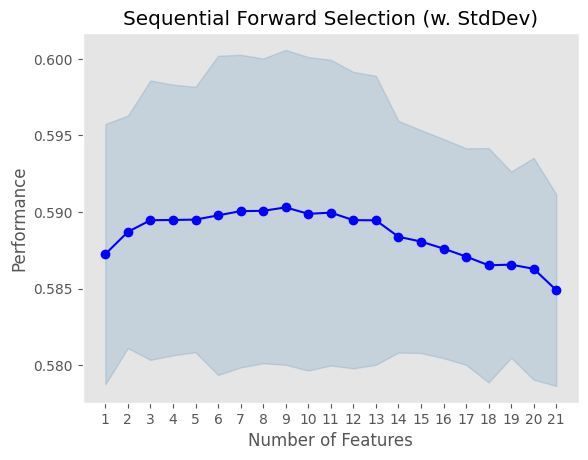

In [80]:
fig1 = plot_sfs( selection.get_metric_dict(), kind='std_dev')

plt.title('Sequential Forward Selection (w. StdDev)')
plt.grid()
plt.show()

# 문제 4

## 단계 1

In [81]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [84]:
cols = x_train.loc[ :, 'measurement_0':'measurement_17'].columns
cols

Index(['measurement_0', 'measurement_1', 'measurement_2', 'measurement_3',
       'measurement_4', 'measurement_5', 'measurement_6', 'measurement_7',
       'measurement_8', 'measurement_9', 'measurement_10', 'measurement_11',
       'measurement_12', 'measurement_13', 'measurement_14', 'measurement_15',
       'measurement_16', 'measurement_17'],
      dtype='object')

In [85]:
lda = LinearDiscriminantAnalysis()

In [86]:
lda.fit( x_train[ cols ], y_train )

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

In [87]:
lda.explained_variance_ratio_

array([1.])

In [89]:
x_lda = lda.transform( x_train[ cols ] )
x_lda

array([[0.76210336],
       [1.1637211 ],
       [1.20687717],
       ...,
       [0.31494685],
       [0.39097403],
       [0.32880796]])

In [92]:
F = sps.spearmanr( x_lda, x_train['loading'] ).pvalue
F

0.05892147168923654

In [93]:
from sklearn.decomposition import PCA

In [103]:
pca = PCA(n_components=0.5)

In [104]:
pca.fit( x_train[cols] )

PCA(copy=True, iterated_power='auto', n_components=0.5, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [108]:
G = pca.transform( x_train[cols] ).shape[1]
G

8

## 단계 3

In [112]:
# 어차피 PCA 변환값의 순서는 분산설명력이 높은 순으로 나온다.
# 내용상 모든 컴포넌트를 사용해야 하므로, 모든 컴포넌트를 파생변수로 두고 선택하는 방법이 더 효율적일 것
x_train_pca = pd.DataFrame( pca.transform( x_train[cols] ), index=x_train.index, columns=[ f'pc_{i}' for i in range(1, 9)] )
x_test_pca = pd.DataFrame( pca.transform( x_test[cols] ), index=x_test.index, columns=[ f'pc_{i}' for i in range(1, 9)] )

In [114]:
x_train_pca['loading'] = x_train.loading
x_test_pca['loading'] = x_test.loading

In [127]:
# 하나만 추가하는 경우
model = LogisticRegression( solver='lbfgs' ).fit( x_train_pca[ ['pc_1', 'loading']], y_train )

In [128]:
y_hat = model.predict_proba( x_test_pca[['pc_1', 'loading']] )[:, 1]
auc = roc_auc_score( y_test, y_hat )
auc

0.5848587091975707

In [ ]:
loading + G개의 컴포넌트

In [122]:
selected_cols = []
for i in range(9):
    selected_cols.append(i)
    print( selected_cols )
    model = LogisticRegression( solver='lbfgs' ).fit( x_train_pca.iloc[:, selected_cols], y_train )
    y_hat = model.predict_proba( x_test_pca.iloc[:, selected_cols] )[:, 1]
    auc = roc_auc_score( y_test, y_hat )
    print(auc)

[0]
0.515273132664437
[0, 1]
0.515579504911643
[0, 1, 2]
0.5161331422200988
[0, 1, 2, 3]
0.5240068761359662
[0, 1, 2, 3, 4]
0.5245027197514871
[0, 1, 2, 3, 4, 5]
0.5266594752923753
[0, 1, 2, 3, 4, 5, 6]
0.5338318039348967
[0, 1, 2, 3, 4, 5, 6, 7]
0.5349420339111061
[0, 1, 2, 3, 4, 5, 6, 7, 8]
0.591330617686512


In [123]:
H = 8

In [124]:
round( F + G + H, 2)

16.06

# 문제 5

## 단계 1

In [133]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [143]:
kFold = StratifiedKFold( n_splits=5, random_state=123, shuffle=True )

In [144]:
params = dict(
    n_estimators = [5, 10, 15],
    max_depth = [5, 6, 7],
    min_samples_split = [256, 512]
)

model = RandomForestClassifier( random_state=123 )
search = GridSearchCV( estimator=model, param_grid=params, scoring='roc_auc', cv=kFold ).\
    fit( x_train[ ['loading'] + con_cols + cat_cols ], y_train )

In [145]:
search.best_params_, search.best_score_

({'max_depth': 5, 'min_samples_split': 256, 'n_estimators': 15},
 0.5798395032186698)

## 단계 2

In [140]:
model = RandomForestClassifier( max_depth=5, min_samples_split=256, n_estimators=15, random_state=123).\
    fit( x_train[ ['loading'] + con_cols + cat_cols ], y_train )

In [141]:
y_hat = model.predict_proba( x_test[ ['loading'] + con_cols + cat_cols ] )[:, 1]
auc = roc_auc_score( y_test, y_hat )
auc

0.5779940662952765

In [142]:
round( auc, 3 )

0.578

# 문제 6

In [171]:
train = pd.read_csv('../00. Data/train_prob-1.csv')
test = pd.read_csv('../00. Data/test_prob-1.csv')

# 실제 시험에서는 알 수 없지만
# 모의 문제에서는 직접 확인해보도록 합니다.
ans = pd.read_csv('../00. Data/test_prob_ans-1.csv')

In [172]:
train = train.fillna(0)
test = test.fillna(0)

In [173]:
train = train.drop( columns=['id', 'product_code', 'attribute_0', 'attribute_1'] )
test = test.drop( columns=['product_code', 'attribute_0', 'attribute_1'] )

In [174]:
model = LogisticRegression().fit( train.drop( columns=['failure']), train['failure'] )

In [175]:
y_hat = model.predict_proba( train.drop( columns=['failure']) )[:, 1]
auc = roc_auc_score( train['failure'], y_hat )
auc

0.5861094413814293

실제로 제출해야 되는 내용은 아래와 같습니다. 

In [176]:
y_hat = model.predict_proba( test.drop(columns='id') )[:, 1]
y_hat

array([0.17549859, 0.22825883, 0.19905798, ..., 0.18004455, 0.26722356,
       0.21679316])

In [179]:
predict = pd.DataFrame( y_hat, index=test.id, columns=['failure'] )
predict

,failure
id,
16115,0.175499
16116,0.228259
16117,0.199058
16118,0.321018
16119,0.214863
...,...
21222,0.228836
21223,0.338577
21224,0.180045


In [180]:
# 실제 시험에서는 확인할 수 없지마 
# 정답과 예측값을 비교
roc_auc_score( ans['failure'], predict['failure'] )

0.5886427607913669